In [53]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [54]:
data_numerical

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,2,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,2,460,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,2,608,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,3,642,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,3,836,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,1,2,460,0,40,0,0,0,0,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,2,2,500,349,0,0,0,0,0,0
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,...,2,1,252,0,60,0,0,0,0,2500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,...,0,1,240,366,0,112,0,0,0,0


<AxesSubplot:>

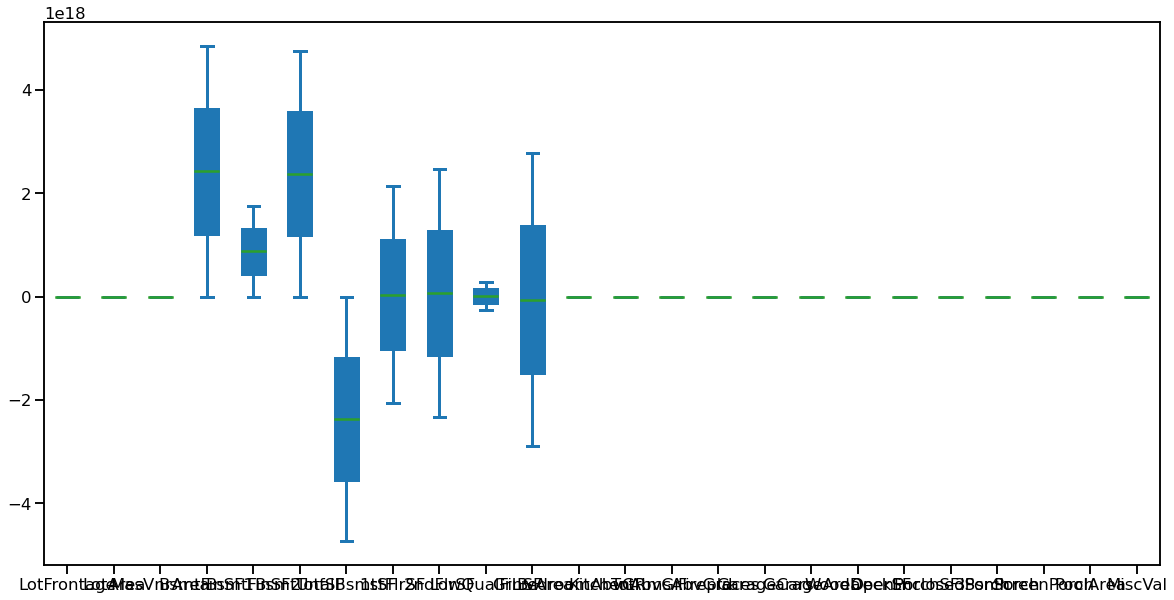

In [55]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

model = make_pipeline(StandardScaler(), Ridge(alpha=0))
cv_results= cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

df = pd.DataFrame(cv_results)
df.sort_values('test_score', ascending=False, inplace=True)
pd.DataFrame([model[-1].coef_ for model in cv_results['estimator']], columns=numerical_features).describe().loc[['min', 'max']].plot.box(figsize=(20,10))

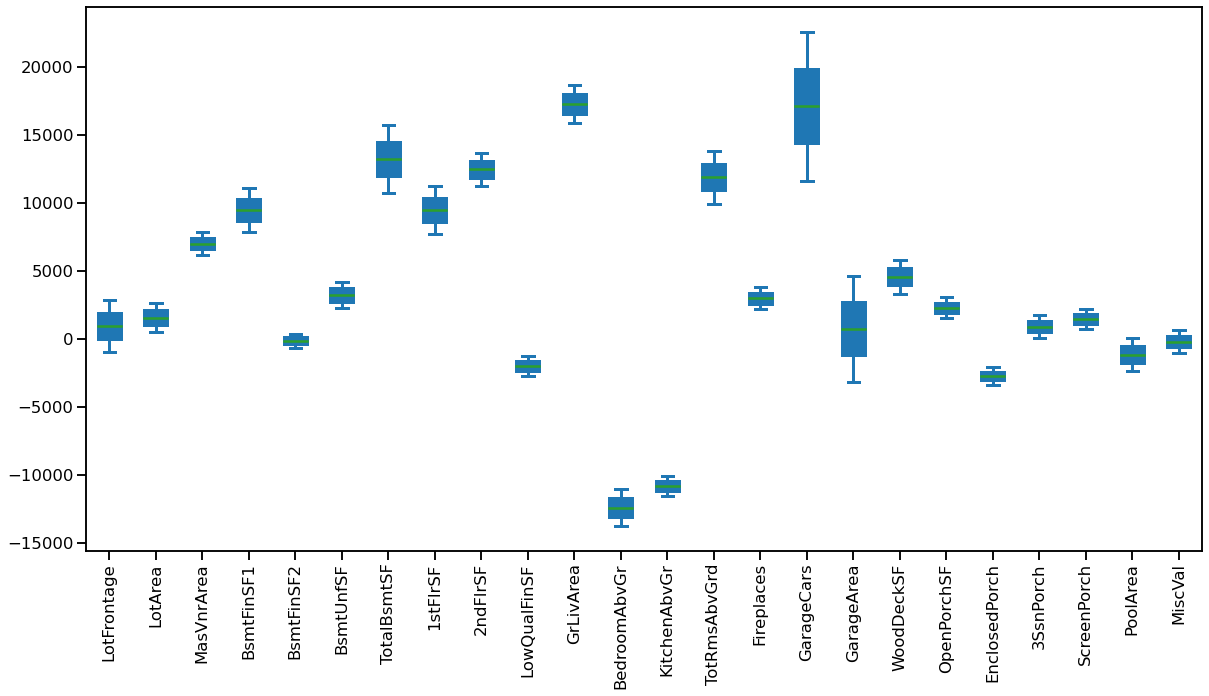

In [56]:
import matplotlib.pyplot as plt
model = make_pipeline(StandardScaler(), Ridge(alpha=1))
cv_results= cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

df = pd.DataFrame(cv_results)
df.sort_values('test_score', ascending=False, inplace=True)
pd.DataFrame([model[-1].coef_ for model in cv_results['estimator']], columns=numerical_features).describe().loc[['min', 'max']].plot.box(figsize=(20,10))
_ = plt.xticks(rotation = 90)

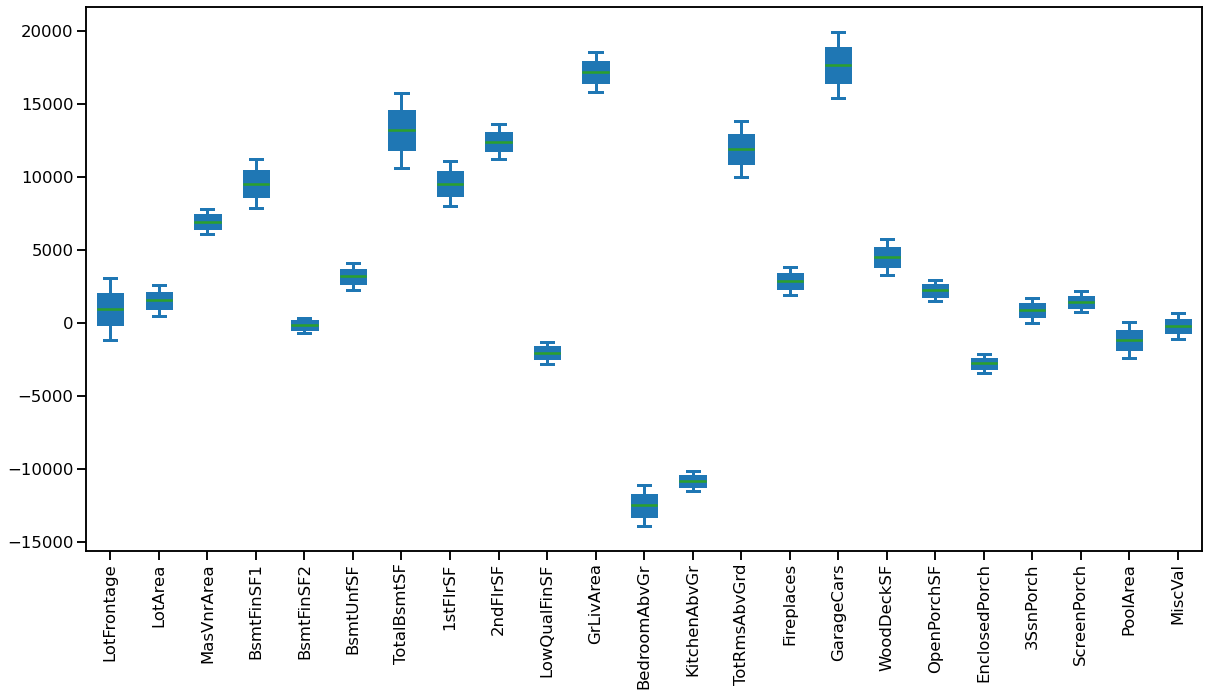

In [57]:
numerical_features.remove('GarageArea')
data_numerical = data[numerical_features]
cv_results= cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

df = pd.DataFrame(cv_results)
df.sort_values('test_score', ascending=False, inplace=True)
pd.DataFrame([model[-1].coef_ for model in cv_results['estimator']], columns=numerical_features).describe().loc[['min', 'max']].plot.box(figsize=(20,10))
_ = plt.xticks(rotation = 90)